# 1. Getting Started: Airbnb Copenhagen

In [20]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Either use conda base python or pip install required libraries

from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


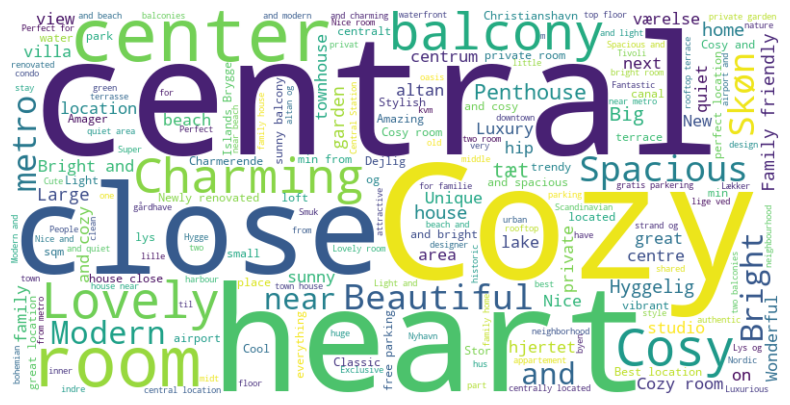

In [22]:
# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
data_filtered.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_category'],
      dtype='object')

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

After extracting words and removing words, we can see that the most common names also appear on the Danmarks Statistic's site for most common names

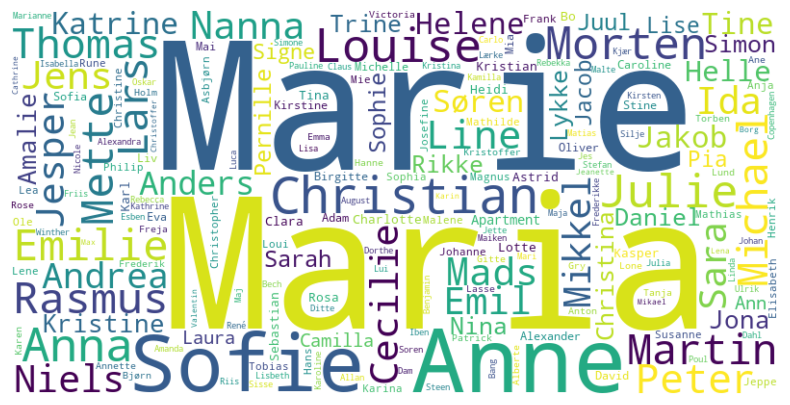

In [24]:
names = ' '.join(data_filtered['host_name'].unique())
stop_words = ['ApartmentinCopenhagen', 'Og', 'And', 'A', 'place']

name_array = names.split(' ')

l2 = ' '.join([ s for s in name_array if s.isalpha() ])
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(l2)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
grouped = data_filtered.groupby('host_name').size().reset_index(name='Count')
grouped = grouped[~grouped['host_name'].isin(stop_words)] 
display(grouped.sort_values(by='Count', ascending=False).head(30))

,host_name,Count
2220,Mette,131
582,Christian,116
1504,Julie,107
2052,Maria,104
189,Anna,96
220,Anne,96
1948,Mads,94
2709,Rasmus,92
1902,Louise,92
3197,Thomas,91


### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

We have used plotly's graph objects as it gave us a more readable map

In [26]:
data = {
    'lat': list(data_filtered['latitude']),
    'lon': list(data_filtered['longitude']),
    'text': ['Copenhagen', 'Odense', 'Aarhus']
}

fig = go.Figure(go.Scattermapbox(
    lat=data['lat'],
    lon=data['lon'],
    mode='markers',
    marker=go.scattermapbox.Marker(size=4, color='blue'),
    text=data['text'],
))

fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        zoom=10,
        center=dict(lat=55.6761, lon=12.5683)
    ),
    title='Scatter Plot on Map using Graph Objects',
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

After removing the outliers from the graphs (as they were unreadable) we found out that there's a correlation between neighbourhoods and the price, and some review scores. <br>
This means that neighbourhoods could be a good variable for prediction of other values. 

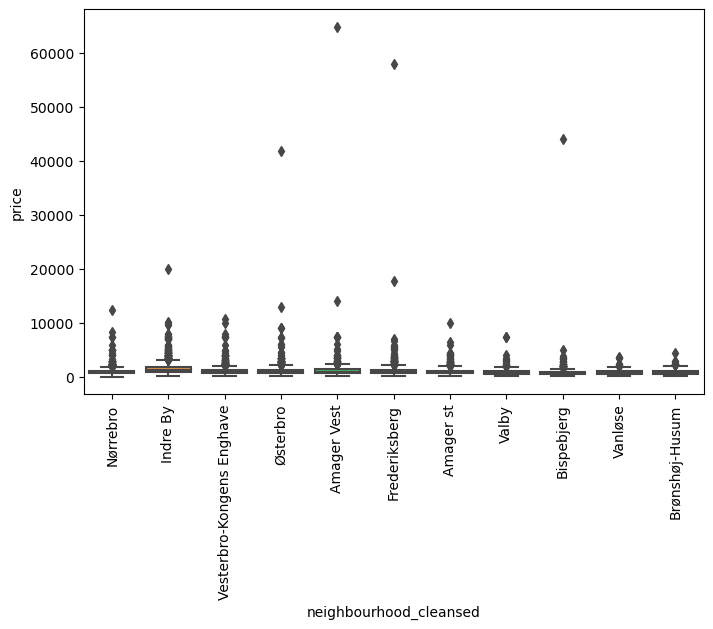

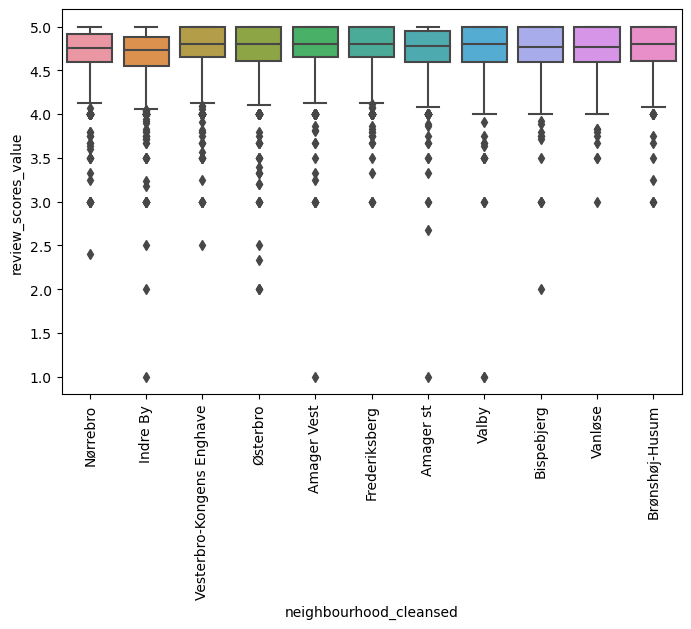

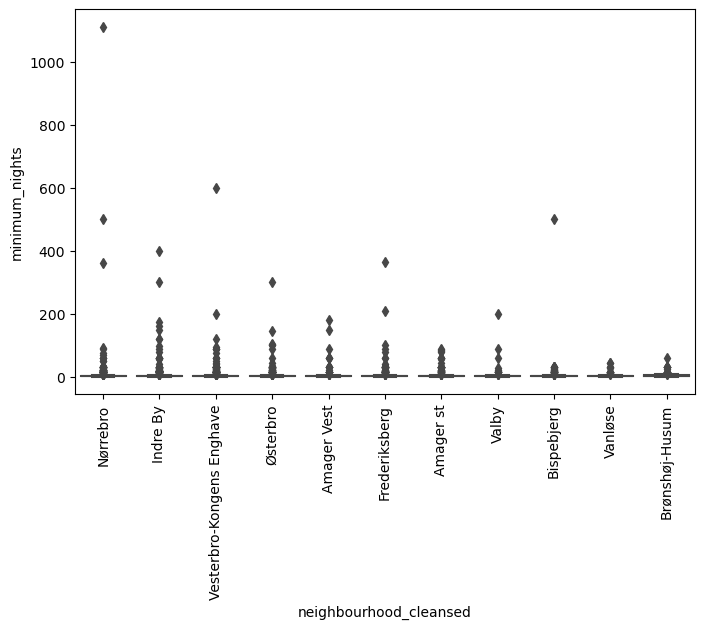

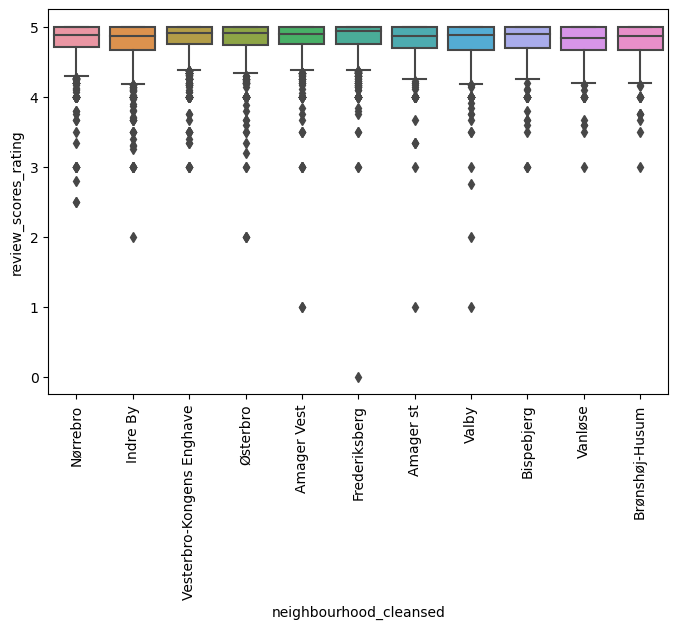

In [27]:
def show_boxplot_with_outliers(x_label ,y_label):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=x_label, y=y_label, data=data_filtered, showfliers=True)
    plt.xticks(rotation=90)
    plt.show()

n = 'neighbourhood_cleansed'

show_boxplot_with_outliers(n, 'price')
show_boxplot_with_outliers(n, 'review_scores_value')
show_boxplot_with_outliers(n, 'minimum_nights') # Does not really give anything
show_boxplot_with_outliers(n, 'review_scores_rating')

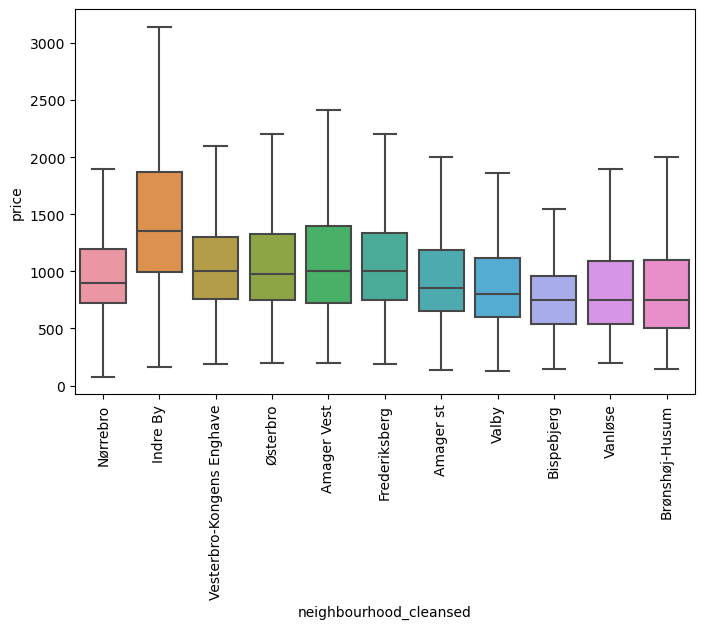

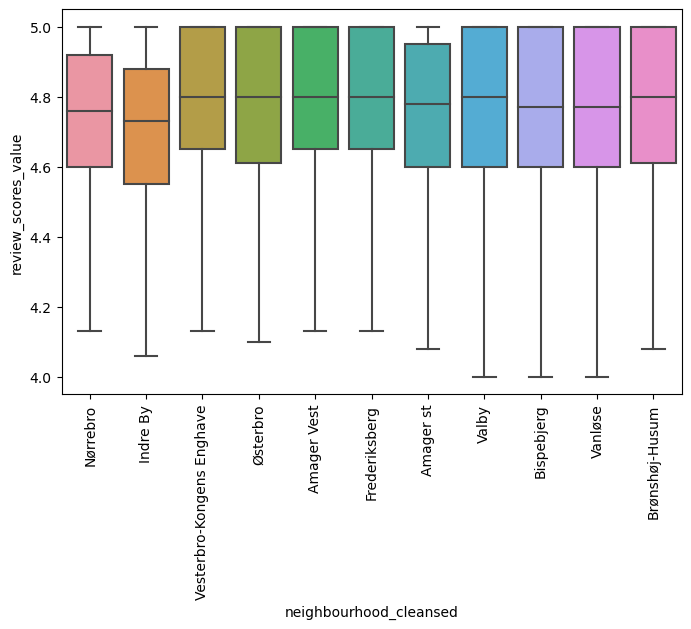

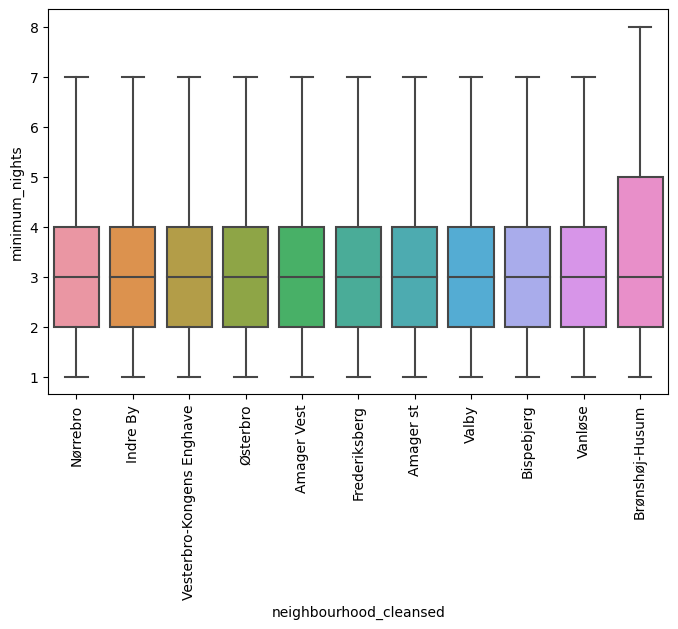

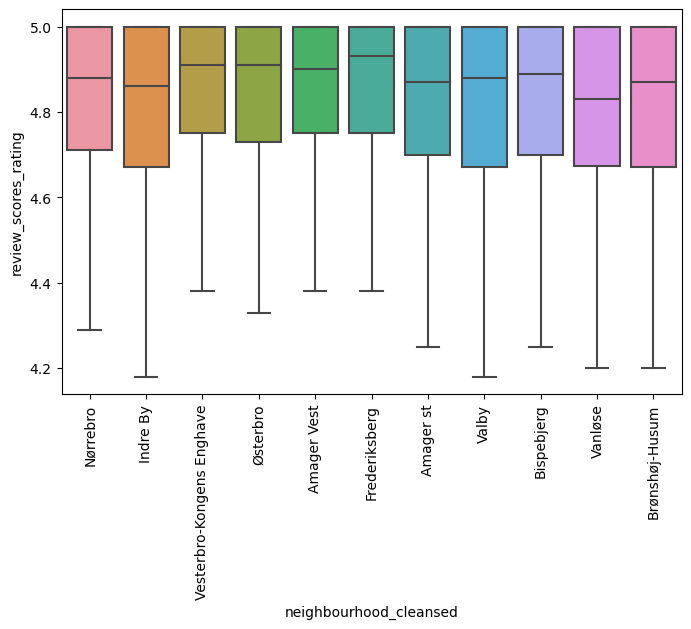

In [28]:
def show_boxplot(x_label ,y_label):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=x_label, y=y_label, data=data_filtered, showfliers=False)
    plt.xticks(rotation=90)
    plt.show()
n = 'neighbourhood_cleansed'

show_boxplot(n, 'price')
show_boxplot(n, 'review_scores_value')
show_boxplot(n, 'minimum_nights') # Does not really give anything
show_boxplot(n, 'review_scores_rating')

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [29]:
# Creating a filter for neighbourhoods and room type combinations that have at least more than 10 apartments

grouped = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='Count')
display(grouped.sort_values(by='Count', ascending=False).head(30))


filtering_df = grouped[grouped['Count'] > 10][['neighbourhood_cleansed', 'room_type']]

,neighbourhood_cleansed,room_type,Count
19,Nørrebro,Entire home/apt,1889
26,Vesterbro-Kongens Enghave,Entire home/apt,1811
15,Indre By,Entire home/apt,1702
29,Østerbro,Entire home/apt,1174
13,Frederiksberg,Entire home/apt,1044
0,Amager Vest,Entire home/apt,909
3,Amager st,Entire home/apt,791
7,Bispebjerg,Entire home/apt,508
22,Valby,Entire home/apt,450
24,Vanløse,Entire home/apt,254


In [30]:
display("Mean:")
df = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']) \
    [['price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']] \
        .mean().merge(filtering_df, on=['neighbourhood_cleansed', 'room_type'], how='inner')
display(df.sort_values('price', ascending=False))

display("Median:")
df = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']) \
    [['price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']].median() \
    .merge(filtering_df, on=['neighbourhood_cleansed', 'room_type'], how='inner')
display(df.sort_values('price', ascending=False))

display("Max:")
df = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']) \
    [['price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']].max() \
    .merge(filtering_df, on=['neighbourhood_cleansed', 'room_type'], how='inner')
display(df.sort_values('price', ascending=False))

display("Min:")
df = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']) \
    [['price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']].min() \
    .merge(filtering_df, on=['neighbourhood_cleansed', 'room_type'], how='inner')
display(df.sort_values('price', ascending=False))

display("Quantile:")
df = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']) \
    [['price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']].quantile([0.25, 0.5, 0.75]) \
    .merge(filtering_df, on=['neighbourhood_cleansed', 'room_type'], how='inner')
display(df.sort_values('price', ascending=False))

'Mean:'

,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,review_scores_rating
10,Indre By,Entire home/apt,1642.387192,4.264982,30.964160,4.779935
8,Frederiksberg,Entire home/apt,1292.472222,4.439655,16.172414,4.835469
20,Østerbro,Entire home/apt,1248.551107,4.261499,14.417376,4.814114
0,Amager Vest,Entire home/apt,1234.226623,4.041804,16.925193,4.818295
18,Vesterbro-Kongens Enghave,Entire home/apt,1181.435119,4.434567,17.699613,4.832601
2,Amager st,Entire home/apt,1093.584071,4.281922,17.463970,4.809393
12,Nørrebro,Entire home/apt,1047.742192,4.710429,16.183166,4.806829
1,Amager Vest,Private room,1032.966216,2.378378,46.716216,4.813108
14,Valby,Entire home/apt,1017.968889,4.060000,13.062222,4.767467
6,Brønshøj-Husum,Entire home/apt,1014.995370,4.435185,13.736111,4.779769


'Median:'

,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,review_scores_rating
10,Indre By,Entire home/apt,1400.0,3.0,14.0,4.860
0,Amager Vest,Entire home/apt,1050.0,3.0,8.0,4.900
8,Frederiksberg,Entire home/apt,1037.0,3.0,8.0,4.940
20,Østerbro,Entire home/apt,1000.0,3.0,7.0,4.920
18,Vesterbro-Kongens Enghave,Entire home/apt,1000.0,3.0,8.0,4.920
12,Nørrebro,Entire home/apt,950.0,3.0,9.0,4.880
2,Amager st,Entire home/apt,900.0,3.0,8.0,4.880
6,Brønshøj-Husum,Entire home/apt,900.0,3.0,7.0,4.875
14,Valby,Entire home/apt,899.0,3.0,6.0,4.880
16,Vanløse,Entire home/apt,826.5,3.0,7.0,4.860


'Max:'

,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,review_scores_rating
1,Amager Vest,Private room,64900.0,30,536,5.0
8,Frederiksberg,Entire home/apt,58000.0,365,298,5.0
4,Bispebjerg,Entire home/apt,44000.0,500,196,5.0
20,Østerbro,Entire home/apt,41800.0,300,267,5.0
10,Indre By,Entire home/apt,20000.0,400,602,5.0
0,Amager Vest,Entire home/apt,14000.0,180,195,5.0
12,Nørrebro,Entire home/apt,12500.0,1111,431,5.0
18,Vesterbro-Kongens Enghave,Entire home/apt,10800.0,600,289,5.0
2,Amager st,Entire home/apt,10000.0,90,453,5.0
13,Nørrebro,Private room,8400.0,70,276,5.0


'Min:'

,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,review_scores_rating
10,Indre By,Entire home/apt,350.0,1,1,2.00
14,Valby,Entire home/apt,303.0,1,1,1.00
18,Vesterbro-Kongens Enghave,Entire home/apt,300.0,1,1,3.00
8,Frederiksberg,Entire home/apt,300.0,1,1,0.00
16,Vanløse,Entire home/apt,269.0,1,1,3.00
20,Østerbro,Entire home/apt,268.0,1,1,2.00
0,Amager Vest,Entire home/apt,250.0,1,1,1.00
6,Brønshøj-Husum,Entire home/apt,250.0,1,1,3.00
2,Amager st,Entire home/apt,240.0,1,1,1.00
4,Bispebjerg,Entire home/apt,235.0,1,1,3.00


'Quantile:'

,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,review_scores_rating
32,Indre By,Entire home/apt,1911.0,4.0,35.0,5.000
2,Amager Vest,Entire home/apt,1480.0,4.0,19.0,5.000
62,Østerbro,Entire home/apt,1400.0,4.0,17.0,5.000
31,Indre By,Entire home/apt,1400.0,3.0,14.0,4.860
26,Frederiksberg,Entire home/apt,1400.0,4.0,20.0,5.000
...,...,...,...,...,...,...
52,Vanløse,Private room,337.5,2.0,18.5,4.785
21,Brønshøj-Husum,Private room,320.0,1.0,5.5,4.675
45,Valby,Private room,307.0,1.0,3.0,4.670
15,Bispebjerg,Private room,300.0,1.0,4.0,4.660


In [31]:
affordable = data_filtered[data_filtered['price_category'] == 0]
expensive = data_filtered[data_filtered['price_category'] == 1]

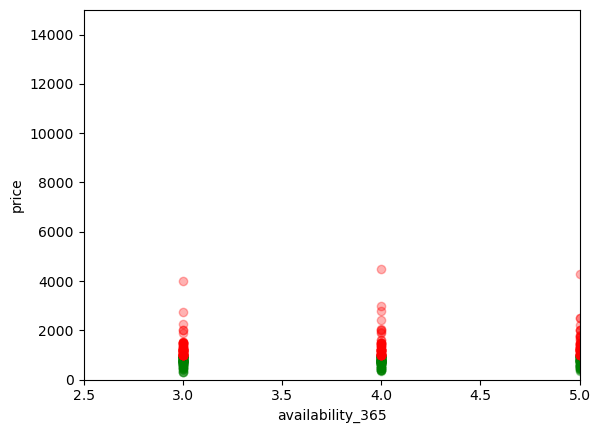

In [32]:
x_label = 'availability_365'
y_label = 'price'

alpha = 0.3

plt.scatter(affordable[x_label], affordable[y_label], color='green', alpha=alpha)
plt.scatter(expensive[x_label], expensive[y_label], color='red', alpha=alpha)

plt.xlim([2.5, 5])
plt.ylim([0, 15000])

plt.ylabel(y_label)
plt.xlabel(x_label)
plt.show()

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

We have decided to train a model around neighbourhood, room types, and different types of reviews. <br>
Also, we have removed outliers (only from the training dataset for accurate scoring) based on a Z-score. We have tried different values, but 0.75 seems to give best results. <br>
The difference in accuracy between individual models (linear regression, ridge, and lasso) was negligible, but they gave us a different perspective on which columns were most important for prediction. <br>
The highest impact had different degrees of polynomial, where the accuracy raised at an extremely high rate, but also with great differance in time that was required to train the model. <br>
For a 4th degree polynomial, we have achieved a score of 0.548 on test data. Training time on Apple M1 Max was just under 3 minutes. <br>
5th degree achieved 0.652 in 10 minutes and 6th degree took 96 minutes and showed negative score, meaning strong overfitting.

In [33]:
df = data_filtered.drop(
    columns=[
    'id',
    'name',
    'host_id',
    'host_name',
    'last_review',
    'price_category',
    'minimum_nights',
    'availability_365',
    'calculated_host_listings_count',
    'latitude',
    'longitude'
    ]
)

display(df)

,neighbourhood_cleansed,room_type,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Nørrebro,Entire home/apt,898.0,172,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08
1,Indre By,Entire home/apt,2600.0,59,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55
2,Indre By,Entire home/apt,3250.0,300,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06
3,Vesterbro-Kongens Enghave,Entire home/apt,725.0,24,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16
4,Vesterbro-Kongens Enghave,Entire home/apt,1954.0,19,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...
13808,Brønshøj-Husum,Entire home/apt,856.0,4,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85
13809,Bispebjerg,Entire home/apt,1050.0,4,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64
13811,Valby,Entire home/apt,450.0,3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01
13812,Valby,Entire home/apt,400.0,3,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27


In [34]:
neighbourhood_dummies = pd.get_dummies(df['neighbourhood_cleansed'], dtype='int')
room_dummies = pd.get_dummies(df['room_type'], dtype='int')
df = df.drop(['neighbourhood_cleansed', 'room_type'], axis=1)
df = pd.concat([df, neighbourhood_dummies, room_dummies], axis='columns')
df

,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,...,Indre By,Nørrebro,Valby,Vanløse,Vesterbro-Kongens Enghave,Østerbro,Entire home/apt,Hotel room,Private room,Shared room
0,898.0,172,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,...,0,1,0,0,0,0,1,0,0,0
1,2600.0,59,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,...,1,0,0,0,0,0,1,0,0,0
2,3250.0,300,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,...,1,0,0,0,0,0,1,0,0,0
3,725.0,24,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,...,0,0,0,0,1,0,1,0,0,0
4,1954.0,19,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,856.0,4,4.75,4.75,4.00,5.00,5.00,4.50,5.00,1.85,...,0,0,0,0,0,0,1,0,0,0
13809,1050.0,4,5.00,4.50,5.00,5.00,5.00,4.75,5.00,1.64,...,0,0,0,0,0,0,1,0,0,0
13811,450.0,3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.01,...,0,0,1,0,0,0,1,0,0,0
13812,400.0,3,5.00,5.00,4.67,5.00,5.00,4.67,5.00,1.27,...,0,0,1,0,0,0,1,0,0,0


In [35]:
# Removing outliers
from scipy import stats

train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)


train_cleaned = train[(np.abs(stats.zscore(train[['price']])) < 0.75).all(axis=1)].copy()

In [36]:
X_train = train_cleaned.drop(columns=['price'])
y_train = train_cleaned['price']

X_test = train_cleaned.drop(columns=['price'])
y_test = train_cleaned['price']


In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Score on train set = {0}, Score on test set = {1}".format(lin_reg.score(X_train, y_train), lin_reg.score(X_test, y_test)))

Score on train set = 0.24820015046007593, Score on test set = 0.24820015046007593


Intercept: -14.978403224925842


Text(0, 0.5, 'Feature')

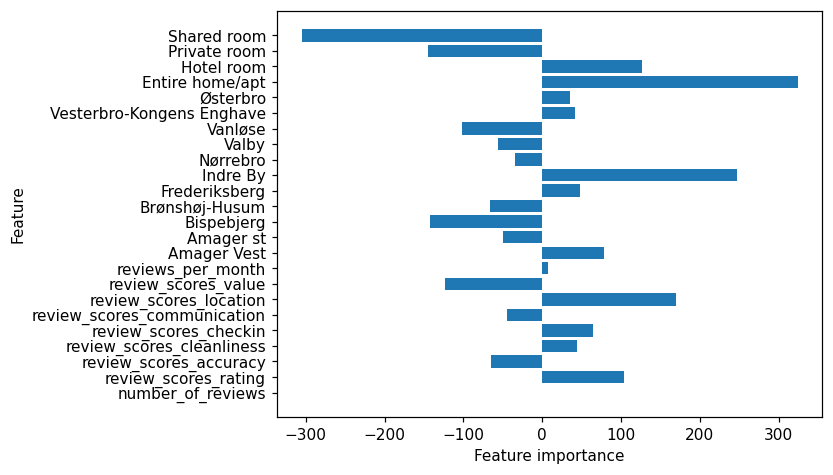

In [38]:
print("Intercept:", lin_reg.intercept_)

n_features = len(lin_reg.coef_)
plt.figure(dpi = 110)
plt.barh(range(n_features), lin_reg.coef_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [39]:
ridge_cv = RidgeCV(alphas = np.linspace(1, 10, 10))
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

8.0

In [40]:
ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)

print("Score on train set = {0}, Score on test set = {1}".format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

Score on train set = 0.24799094974268043, Score on test set = 0.24799094974268043


Intercept: 3.0634317923778553


Text(0, 0.5, 'Feature')

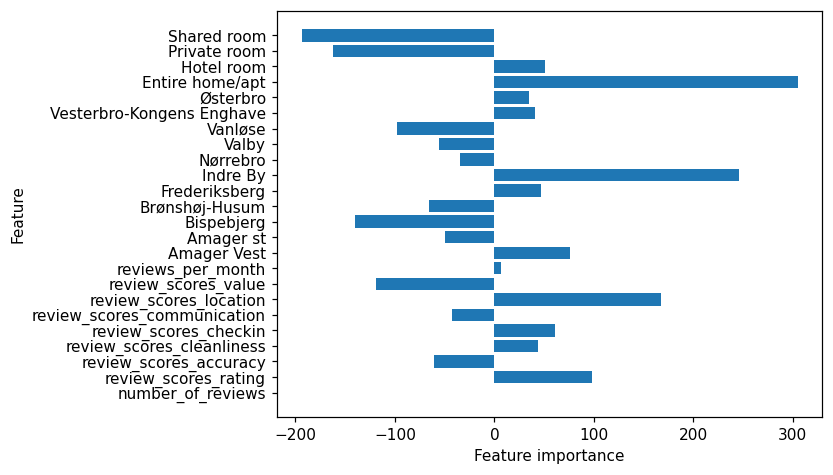

In [41]:
print("Intercept:", ridge.intercept_)

n_features = len(ridge.coef_)
plt.figure(dpi = 110)
plt.barh(range(n_features), ridge.coef_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

### Lasso

In [42]:
lasso_cv = LassoCV(alphas = np.linspace(1, 40, 100))
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

1.0

In [43]:
lasso = Lasso(alpha=1)

lasso.fit(X_train, y_train)

print("Score on train set = {0}, Score on test set = {1}".format(lasso.score(X_train, y_train), lasso.score(X_test, y_test)))

Score on train set = 0.24509955213960877, Score on test set = 0.24509955213960877


Intercept: -216.14006817281938


Text(0, 0.5, 'Feature')

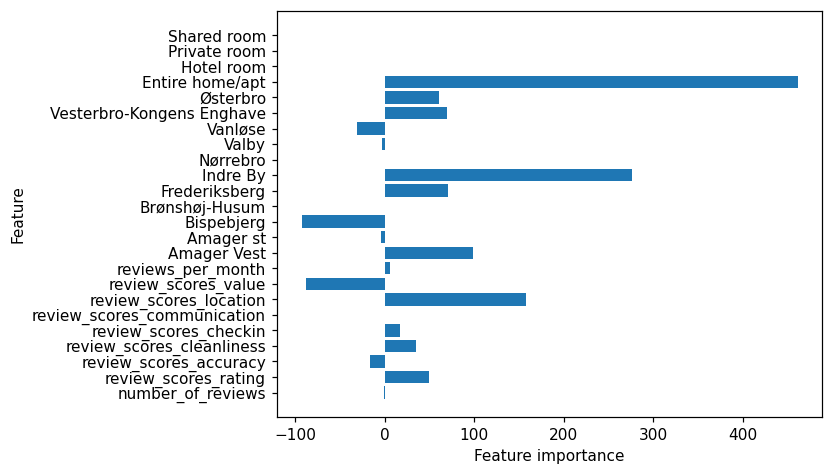

In [44]:
print("Intercept:", lasso.intercept_)

n_features = len(lasso.coef_)
plt.figure(dpi = 110)
plt.barh(range(n_features), lasso.coef_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

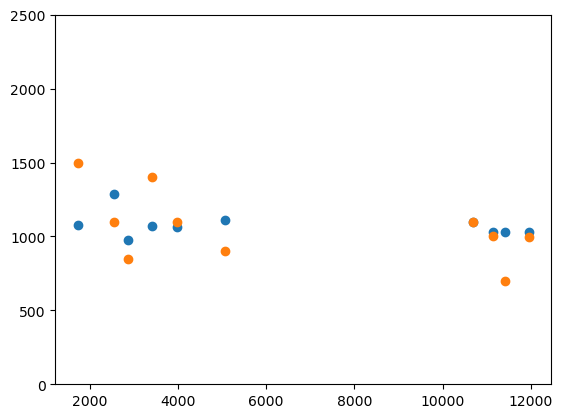

In [45]:
y_prediction = lasso.predict(X_test)

results = pd.DataFrame({
    'prediction': y_prediction,
    'expected': y_test
}).head(10)

plt.scatter(results.index, results['prediction'])
plt.scatter(results.index, results['expected'])
plt.ylim(0, 2500)
plt.show()

## Higher degree polynomial

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

print("Score on train set = {0}, Score on test set = {1}".format(lin_reg.score(X_train_poly, y_train), lin_reg.score(X_test_poly, y_test)))

Score on train set = 0.2798901440711943, Score on test set = 0.2798901440711943


In [47]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

print("Score on train set = {0}, Score on test set = {1}".format(lin_reg.score(X_train_poly, y_train), lin_reg.score(X_test_poly, y_test)))

Score on train set = 0.33781604097570683, Score on test set = 0.33781604097570683


In [48]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

print("Score on train set = {0}, Score on test set = {1}".format(lin_reg.score(X_train_poly, y_train), lin_reg.score(X_test_poly, y_test)))

Score on train set = 0.5483269579725191, Score on test set = 0.5483269579725191


In [49]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

print("Score on train set = {0}, Score on test set = {1}".format(lin_reg.score(X_train_poly, y_train), lin_reg.score(X_test_poly, y_test)))

Score on train set = 0.6518970076439448, Score on test set = 0.6518970076439448


Takes a lot of time to train

In [51]:
# poly = PolynomialFeatures(degree=6)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_poly, y_train)

# print("Score on train set = {0}, Score on test set = {1}".format(lin_reg.score(X_train_poly, y_train), lin_reg.score(X_test_poly, y_test)))

Score on train set = -223084.41703282594, Score on test set = -223084.41703282594
